Dr. Jesús Martí Gavilá. Departamento de Ingeniería Cartográfica, Geodesia y fotogrametría
<font color="blue" ><h1 align=center>PRÁCTICA 7</h1> <p> <h1 align=center> CURSO BÁSICO PYTHON: FICHERO GPX</h1></font>

<a href="http://www.upv.es/titulaciones/GTI/indexc.html"><img src = "http://www.upv.es/imagenes/marcaUPVN1.png" width =200 ></a>

<h2 align=center>Grado Tecnologías Interactivas | Tecnologías de la Información Geográfica</h2>



# TAREA
<div class="alert alert-block alert-info" style="margin-top: 20px">

<b>Realizar un análisis de rendimiento a partir de un fichero GNSS con waypoints en formato GPX.</b>
<p>
    
<h3>El resultado a obtener sera:</h3>  <p> 
   <li>
       <a>Un Dataframe en formato HTML con los siguientes campos:<p><p>
'Punto','Latitud','Longitud', 'Cota (m)', 'Hora', 'Distancia (m)','Dist_O (m)', 'Pendiente (%)', 'Velocidad (km/h)','Orientación (º)','Tiempo'</a><p>
   </li>
        
   <li>
       <a>Gráfico con los valores de distancia en el eje X y valores de pendiente y velocidad en la Y</a>
   </li>
</div>

# Estructura GPX e importación de librerías

In [1]:
#CHENYI JIANG Y CHEN RUIYU

"""
Creado Viernes 14 Oct 18:22:39 2022, @autores: 
FORMATO EJEMPLO GPX
<wpt lat="38.968484" lon="-0.148688">
	<ele>-6.847729</ele>
	<time>2020-10-06T15:42:19Z</time>
	<name>001</name>
	<sym>Flag, Blue</sym>
</wpt>
"""
import pandas as pd
import xml.etree.cElementTree as et
import os
import math as m
from datetime import datetime
import matplotlib.pyplot as plt

# Fichero de entrada y Dataframe de salida

In [2]:
# Introducción de datos. Solicitar al usuario el nombre del fichero sin extensión.
# Este nombre también se utilizará para crear el fichero html

gpx = input("Introduce nombre archivo GPX (sin extensión):")

path = os.getcwd()
print(path)

fichero = path + "/" + gpx + ".gpx"  # Use ".gpx" extension for GPX files
print(fichero)

Introduce nombre archivo GPX (sin extensión):Waypoints
C:\Users\54480.RUIYU_CHEN\Desktop\upv\gps\Python_Extra
C:\Users\54480.RUIYU_CHEN\Desktop\upv\gps\Python_Extra/Waypoints.gpx


In [17]:
# Accedemos al XML y creamos un Dataframe con los campos arriba indicados

docxml = et.parse(fichero)
raiz = docxml.getroot()
puntos = len(raiz)-1
columnas = ['Punto','Latitud','Longitud', 'Cota (m)', 'Hora', 'Distancia (m)',
                           'Dist_O (m)', 'Pendiente (%)', 'Velocidad (km/h)','Orientación (º)','Tiempo']
df = pd.DataFrame(columns=columnas)
print(puntos)

11


# Funciones de cálculo

In [4]:
# Cálculo de la distancia parcial y al origen

#-------------------------DISTANCIA-----------------------------

#distancia entre dos puntos en la esfera 
def dis(latA, lonA, latB, lonB): 
    lat_a = m.radians(latA)
    lat_b = m.radians(latB)
    lon_a = m.radians(lonA)
    lon_b = m.radians(lonB)
    
    d= m.acos((m.sin(lat_a) *m.sin(lat_b)) + (m.cos(lat_a) * m.cos(lat_b) * m.cos(abs(lon_a - lon_b))))
    
    #print(d)
    #pasar a grados 
    ang = m.degrees(d)
    distancia = (111.11 * ang) * 1000
    return distancia

# Distancia = s

#-------------------------DISTANCIA AL ORIGEN-----------------------------

def distancia_al_origen(dis_1, latA, lonA, latB, lonB):
    dis_0 = dis(latA, lonA, latB, lonB)
    distancia_origen = dis_1 + dis_0
    return distancia_origen
    
    
#declaro variables para hacer pruebas 
latitud1 = 38.967718
latitud2 = 38.967415
longitud1 = -0.150631
longitud2 = -0.151293

print(dis(latitud1, longitud1, latitud2, longitud2))
print(distancia_al_origen(188.62,latitud1, longitud1, latitud2, longitud2))
    


66.36274254278376
254.98274254278377


In [5]:
# Cálculo del acimut. Verificar la posición del punto B

#-------------------------ORIENTACIÓN-----------------------------


def acimut(latA, lonA, latB, lonB):
    
    
        lat_a = m.radians(latA)
        lat_b = m.radians(latB)
        lon_a = m.radians(lonA)
        lon_b = m.radians(lonB)
        
        if(lon_b < lon_a):
            
            d= m.acos((m.sin(lat_a) *m.sin(lat_b)) + (m.cos(lat_a) * m.cos(lat_b) * m.cos(abs(lon_a - lon_b))))

            ab = m.acos((m.sin(lat_b) - m.sin(lat_a) * m.cos(d)) / (m.cos(lat_a) * m.sin(d)))
        
            return (360 - m.degrees(ab) )
        
        else:
            d= m.acos((m.sin(lat_a) *m.sin(lat_b)) + (m.cos(lat_a) * m.cos(lat_b) * m.cos(abs(lon_a - lon_b))))

            ab = m.acos((m.sin(lat_b) - m.sin(lat_a) * m.cos(d)) / (m.cos(lat_a) * m.sin(d)))
            
            return( m.degrees(ab))
       
        
# Prueba (funciona)

latitud1 = 38.967415
latitud2 = 38.965885
longitud1 = -0.151293
longitud2 = -0.151144

print(acimut(latitud1, longitud1, latitud2, longitud2))

175.66986133646486


In [6]:
# Cálculo de la pendiente. En %

#-------------------------PENDIENTE--------------------------

def pendiente (z2,z1,r):
    h= (z1-z2)
    P=(h/r)*100
    return P

r=dis(38.967718,-0.150631, 38.967415, -0.151293)
print(r)
res = pendiente(5.751,5.751,r)
print(res)

66.36274254278376
0.0


In [7]:
# Cálculo de la velocidad

#-------------------------VELOCIDAD-----------------------------

def velocidad(tiempo0, tiempo1, lat0, lon0, lat1, lon1):
    
    tiempo_0 = datetime.strptime(tiempo0, '%Y-%m-%dT%H:%M:%SZ')
    
    tiempo_1 = datetime.strptime(tiempo1, '%Y-%m-%dT%H:%M:%SZ')
    
    tiempo = (tiempo_1 - tiempo_0).total_seconds() / 3600
        
    espacio = dis(lat0, lon0, lat1, lon1)/ 1000
    
    velocidad = espacio/tiempo
    
    return velocidad

#pruebas (funciona)

tiempo0= '2020-10-06T15:44:55Z'
tiempo1= '2020-10-06T15:45:44Z'

lat1 = 38.967718
lat2 = 38.7415
lon1 = -0.150631
lon2 = -0.151293

print(velocidad(tiempo0, tiempo1, lat1, lon1, lat2, lon2))
#velocidad(km/h)

#-------------------------TIEMPO-------------------------------

def time(tiempo0, tiempo1):
    
    tiempo_0 = datetime.strptime(tiempo0, '%Y-%m-%dT%H:%M:%SZ')
    tiempo_1 = datetime.strptime(tiempo1, '%Y-%m-%dT%H:%M:%SZ')
    
    tiempo = (tiempo_1 - tiempo_0).total_seconds()
    
    dias = tiempo // 86400
    horas = (tiempo % 86400) // 3600
    minutos = (tiempo % 3600) // 60
    segundos = tiempo % 60

    resultado = "{:02d} days {:02d}:{:02d}:{:02d}".format(int(dias), int(horas), int(minutos), int(segundos))
    
    return resultado

print(time(tiempo0, tiempo1))


1846.6638793979369
00 days 00:00:49


# Obtención de los datos de entrada y llamada a funciones

In [8]:
# Datos del punto A de XML
def puntoA(posicion):
    wpt_1 = raiz[posicion]
    return wpt_1

wptA=puntoA(1)

lat = float(wptA.get("lat"))  # obtenemos el valor de la clave latitud del primer elemento
  # obtenemos el valor del primer hijo

print(lat)

38.968484


In [22]:
# Datos del punto B de XML
def puntoB(posicion):
    wpt_2 = raiz[posicion]
    return wpt_2

wptB=puntoB(1)

lat = float(wptB[0].text)  # obtenemos el valor de la clave latitud del primer elemento
  # obtenemos el valor del primer hijo

print(lat)



-6.847729


,Punto,Latitud,Longitud,Cota (m),Hora,Distancia (m),Dist_O (m),Pendiente (%),Velocidad (km/h),Orientación (º),Tiempo
0,1.0,38.968484,-0.148688,-6.847729,2020-10-06T15:42:19Z,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2.0,38.967718,-0.150631,5.751281,2020-10-06T15:44:55Z,188.196060,188.196060,6.694619,4.342986,243.112958,00 days 00:02:36
2,3.0,38.967415,-0.151293,3.847285,2020-10-06T15:45:44Z,66.362743,254.558803,-2.869074,4.875630,239.515546,00 days 00:00:49
3,4.0,38.965885,-0.151144,4.562065,2020-10-06T15:47:40Z,170.484929,425.043732,0.419263,5.290912,175.669861,00 days 00:01:56
4,5.0,38.965216,-0.150998,5.600896,2020-10-06T15:48:45Z,75.395153,500.438885,1.377849,4.175732,170.369327,00 days 00:01:05


In [28]:
# Llamar a las diferentes funciones y añadir los datos resultantes al Dataframe
posicion = range(puntos)
distancia_ori=[]

for i in posicion:
    
    print(i)
    wptA=puntoA(i+1)
    wptB=puntoB(i)
   
    
    PuntoA=float(wptA[2].text)
    print(PuntoA)
    
    latitudA=float(wptA.get("lat"))
    print(latitudA)
    
    longitudA=float(wptA.get("lon"))
    print(longitudA)
    
    cotaA=float(wptA[0].text)
    print(cotaA)
    
    horaA=wptA[1].text
    print(horaA)
    
    if i==0:       
            
        distanciaA=dis(latitudA, longitudA, latitudA, longitudA)
        print(distanciaA)
            
        distancia_ori.insert(i,distancia_al_origen(0,latitudA, longitudA, latitudA, longitudA))         
        print(distancia_ori[i])
        
        z2=float(wptA[0].text)
        print(z2)
        Pendiente = 0
        print(Pendiente)
        
        Velocidad = 0
        print(Velocidad)
        
        orientacion = 0
        print(orientacion)
        
        Tiempo = 0
        print(Tiempo)
        
        df_0 = pd.DataFrame([[PuntoA, latitudA, longitudA, cotaA, horaA, distanciaA, distancia_ori[i],Pendiente,Velocidad,orientacion,Tiempo]], columns = list(columnas))
    
    else:
        
        latitudB=float(wptB.get("lat"))
        longitudB=float(wptB.get("lon"))
        distanciaA=dis(latitudB, longitudB, latitudA, longitudA)
        print(distanciaA)
              
        distancia_o=distancia_al_origen(distancia_ori[i-1],latitudB, longitudB, latitudA, longitudA)
        distancia_ori.insert(i,distancia_o)
        print(distancia_o)
        
        z2=float(wptA[0].text)
        z1=float(wptB[0].text)
        
        Pendiente = pendiente(z1,z2,distanciaA)
        print(Pendiente)
        
        time0=wptA[1].text
        time1=wptB[1].text
        
        Velocidad = velocidad(time1, time0, latitudA, longitudA, latitudB, longitudB)
        print(Velocidad)
        
        orientacion = acimut(latitudB, longitudB, latitudA, longitudA)
        print(orientacion)      
      
        Tiempo = time(time1,time0)
        print(Tiempo)
        
        df_0 = pd.DataFrame([[PuntoA, latitudA, longitudA, cotaA, horaA, distanciaA, distancia_o,Pendiente,Velocidad,orientacion,Tiempo]], columns = list(columnas))
        
        
        
    
df_c = pd.DataFrame(columns = columnas)
df_c = pd.concat([df,df_0])
df_c.head(11)




0
1.0
38.968484
-0.148688
-6.847729
2020-10-06T15:42:19Z
0.0
0.0
-6.847729
0
0
0
0
1
2.0
38.967718
-0.150631
5.751281
2020-10-06T15:44:55Z
188.1960602679248
188.1960602679248
6.694619420865376
4.34298600618288
243.11295816716907
00 days 00:02:36
2
3.0
38.967415
-0.151293
3.847285
2020-10-06T15:45:44Z
66.36274254278376
254.55880281070856
-2.869073710708237
4.875630064367787
239.51554563833315
00 days 00:00:49
3
4.0
38.965885
-0.151144
4.562065
2020-10-06T15:47:40Z
170.48492926936905
425.0437320800776
0.419262865675731
5.290911598014901
175.66986133646486
00 days 00:01:56
4
5.0
38.965216
-0.150998
5.600896
2020-10-06T15:48:45Z
75.39515263855883
500.4388847186364
1.3778485269207053
4.175731530750951
170.36932708058012
00 days 00:01:05
5
6.0
38.965
-0.150899
4.003664
2020-10-06T15:49:00Z
25.478386477776404
525.9172711964128
-6.268968411297121
6.114812754666337
160.38426210736296
00 days 00:00:15
6
7.0
38.964634
-0.150661
4.726735
2020-10-06T15:49:42Z
45.568711388355304
571.4859825847681
1.

,Punto,Latitud,Longitud,Cota (m),Hora,Distancia (m),Dist_O (m),Pendiente (%),Velocidad (km/h),Orientación (º),Tiempo
0,1.0,38.968484,-0.148688,-6.847729,2020-10-06T15:42:19Z,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2.0,38.967718,-0.150631,5.751281,2020-10-06T15:44:55Z,188.196060,188.196060,6.694619,4.342986,243.112958,00 days 00:02:36
2,3.0,38.967415,-0.151293,3.847285,2020-10-06T15:45:44Z,66.362743,254.558803,-2.869074,4.875630,239.515546,00 days 00:00:49
3,4.0,38.965885,-0.151144,4.562065,2020-10-06T15:47:40Z,170.484929,425.043732,0.419263,5.290912,175.669861,00 days 00:01:56
4,5.0,38.965216,-0.150998,5.600896,2020-10-06T15:48:45Z,75.395153,500.438885,1.377849,4.175732,170.369327,00 days 00:01:05
5,6.0,38.965000,-0.150899,4.003664,2020-10-06T15:49:00Z,25.478386,525.917271,-6.268968,6.114813,160.384262,00 days 00:00:15
6,7.0,38.964634,-0.150661,4.726735,2020-10-06T15:49:42Z,45.568711,571.485983,1.586771,3.905890,153.178389,00 days 00:00:42
7,8.0,38.963839,-0.150091,7.208261,2020-10-06T15:51:12Z,101.131387,672.617369,2.453764,4.045255,150.860998,00 days 00:01:30
8,9.0,38.962955,-0.150394,9.550250,2020-10-06T15:52:27Z,101.649718,774.267087,2.303980,4.879186,194.923348,00 days 00:01:15
9,10.0,38.962942,-0.147204,1.779755,2020-10-06T15:56:15Z,275.600291,1049.867378,-2.819480,4.351584,90.299287,00 days 00:03:48


# Impresión y exportación de los obtenidos

In [29]:
# Imprimir los valores en formato HTML
nombre = "documento"
fichero_html = path + "/" + nombre + ".html"
df_c.to_html(fichero_html)

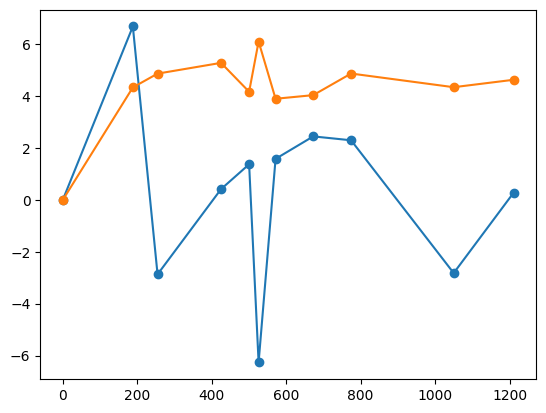

In [45]:
# Plotear el gráfico de rendimiento y guardar en JPG. Puedes ver ayuda en internet matplotlib.plot 
# para indicar leyendas, titulo, etiquetas del eje X

# Empieza con para plotear 2 ejes
fig, ax = plt.subplots()
plt.plot(df["Dist_O (m)"], df['Pendiente (%)'], marker = "o", label="Pendiente %")
plt.plot(df["Dist_O (m)"], df['Velocidad (km/h)'], marker = "o", label="Velocidad (km/h)")

plt.savefig('prac_5.jpg')
plt.show()


# Mapa interactivo con Folium

In [44]:
import folium
from folium import plugins

df.loc[:,['Latitud','Longitud']].to_csv('coordenadas.csv',header=True, index=False) #obtienes los valores de latitud y longitud y creas un fichero de coordenadas
lista_geo = pd.read_csv('coordenadas.csv').to_numpy().tolist()

m = folium.Map()
folium.plugins.AntPath(locations = lista_geo, popup = 'Ruta 20/11/2023', reverse="True", dash_array=[10, 20], color='red', pulse_color = 'blue').add_to(m)
m.fit_bounds(m.get_bounds())
m
